# Language Models with Hugging Face Exercise (5 points)



# 1. Hugging Face Pipelines

Apply the Hugging Face Pipelines API to 3 tasks of your choice. 

For each task, use the created model to make predictions to at least 2 text sequences of your choice.

In [1]:
# Your Code Here
!pip install transformers datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 14.3 MB/s 
     |████████████████████████████████| 451 kB 57.4 MB/s 
     |████████████████████████████████| 7.6 MB 45.5 MB/s 
     |████████████████████████████████| 182 kB 71.5 MB/s 
     |████████████████████████████████| 212 kB 63.6 MB/s 
     |████████████████████████████████| 115 kB 74.1 MB/s 
     |████████████████████████████████| 127 kB 72.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [2]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")

classifier(
    ["I am so excited for the release of my favorite author's new book but also terrified of the plot.", 
     "Avengers Endgame is the best Marvel movie."]
)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'NEGATIVE', 'score': 0.997043788433075},
 {'label': 'POSITIVE', 'score': 0.9998537302017212}]

In [3]:
translator = pipeline("translation_en_to_fr")

translator(["Diwali is the most beautiful hindu festival celebrated to welcome Lord Ram's arrival.",
           "Emily in Paris is a show about fashion."])

No model was supplied, defaulted to t5-base and revision 686f1db (https://huggingface.co/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/892M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/792k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/models/t5/tokenization_t5_fast.py:166: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  FutureWarning,


[{'translation_text': "Diwali est le plus beau festival hindou célébré pour accueillir l'arrivée de Lord Ram."},
 {'translation_text': 'Emily à Paris est un spectacle sur la mode.'}]

# 2. Load the Dataset

We will use the TweetEval dataset from Hugging Face datasets. The dataset has several groups of tweet messages, and we will use the group `stance_climate`. The aim is to predict whether a tweet message is neutral, against, or in favor of climate change.

In [3]:
from datasets import load_dataset

data = load_dataset("tweet_eval", 'stance_climate')

Extracting data files #4:   0%|          | 0/1 [00:00<?, ?obj/s]

Extracting data files #1:   0%|          | 0/1 [00:00<?, ?obj/s]

Extracting data files #3:   0%|          | 0/1 [00:00<?, ?obj/s]

Extracting data files #2:   0%|          | 0/1 [00:00<?, ?obj/s]

Extracting data files #5:   0%|          | 0/1 [00:00<?, ?obj/s]

Extracting data files #0:   0%|          | 0/1 [00:00<?, ?obj/s]

Generating train split:   0%|          | 0/355 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/169 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/40 [00:00<?, ? examples/s]

Dataset tweet_eval downloaded and prepared to /root/.cache/huggingface/datasets/tweet_eval/stance_climate/1.1.0/12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Display the number of samples in the train, test, and validation datasets.

In [4]:
# Your Code Here
print("training data=",data['train'].shape)
print("test data=",data['test'].shape)
print("validation data=",data['validation'].shape)

training data= (355, 2)
test data= (169, 2)
validation data= (40, 2)


Display the categories of the sentences in the dataset.

In [6]:
# Your Code Here
data['train'].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['none', 'against', 'favor'], id=None)}

Display the first 20 messages using Pandas dataframe.

In [7]:
# Your Code Here
data.set_format(type='pandas')
df = data["train"][:]
df.head(20)

,text,label
0,Why Is The Pope Upset? via @user #UnzippedTru...,0
1,We support Australia's Climate Roundtable whic...,2
2,It's nights like this when I'm not so fond of ...,0
3,#Republican party will go down in history book...,0
4,RT @user @user We need degrowth - stop destroy...,2
5,@user - #Wrong #century re the #IPCCreport & t...,0
6,Thanks #MarcLevine & #Ilike_Mike for supportin...,0
7,That awkward moment when a pro-coal PR campaig...,2
8,Attenborough: 'The real problem is global' i.e...,2
9,#Technology is a sign of how far we have come!...,0


Create a bar plot to inspect the distribution of the labels in the train dataset.

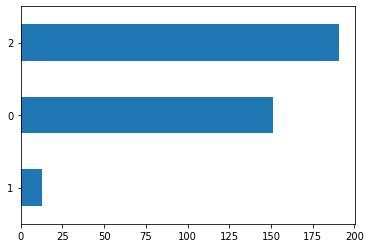

In [8]:
# Your Code Here
import matplotlib.pyplot as plt

df["label"].value_counts(ascending=True).plot.barh()
plt.show()

# 3. Tokenization

Apply the tokenizer from the `"distilbert-base-uncased"` model to the first 10 sentences in the train dataset, by setting `padding=True`. Display the sequences of word indices and the attention masks.

In [9]:
# Your Code Here
data.set_format(type=None)

training_samples_10 = data["train"][:10]

text_training_10 = training_samples_10['text']

from transformers import AutoTokenizer

model = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model)

output_tokens_10 = tokenizer(text_training_10, padding=True)

print("Input IDs")
for item in output_tokens_10.input_ids:
    print(item)

print("Attention Mask")
for item in output_tokens_10.attention_mask:
    print(item)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Input IDs
[101, 2339, 2003, 1996, 4831, 6314, 1029, 3081, 1030, 5310, 1001, 4895, 5831, 11469, 16344, 14317, 1001, 4831, 27843, 12273, 2483, 1001, 7367, 5244, 2102, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[101, 2057, 2490, 2660, 1005, 1055, 4785, 2461, 10880, 2029, 2003, 4346, 1037, 7705, 2005, 21082, 5981, 3805, 1997, 3000, 1030, 5310, 1001, 7367, 5244, 2102, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[101, 2009, 1005, 1055, 6385, 2066, 2023, 2043, 1045, 1005, 1049, 2025, 2061, 13545, 1997, 2026, 2146, 2606, 1012, 1045, 2074, 10587, 24494, 2009, 2035, 2125, 999, 1001, 3684, 16535, 1001, 1052, 2078, 27767, 4313, 2140, 1001, 7367, 5244, 2102, 102]
[101, 1001, 3951, 2283, 2097, 2175, 2091, 1999, 2381, 2808, 2004, 2283, 2008, 2768, 1999, 1996, 2126, 1997, 1001, 5637, 15950, 2015, 1998, 6349, 2000, 7901, 1001, 7367, 5244, 2102, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[101, 19387, 1030, 5310, 1030, 5310, 2057, 2342, 2139, 26982, 1011, 2644, 9846, 2256, 4774, 1010, 17531, 1012, 1001

Convert the tokenized sequences for the first and the second sentences to text, and compare them to the raw text sentences.

In [10]:
# Your Code Here
i=0
for item in output_tokens_10.input_ids:
    print("Tokenizes sentence=",tokenizer.convert_ids_to_tokens(item))
    print("Raw text = ",text_training_10[i])
    i+=1

Tokenizes sentence= ['[CLS]', 'why', 'is', 'the', 'pope', 'upset', '?', 'via', '@', 'user', '#', 'un', '##zi', '##pped', '##tr', '##uth', '#', 'pope', '##fra', '##nc', '##is', '#', 'se', '##ms', '##t', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
Raw text =  Why Is The Pope Upset?  via @user #UnzippedTruth #PopeFrancis #SemST
Tokenizes sentence= ['[CLS]', 'we', 'support', 'australia', "'", 's', 'climate', 'round', '##table', 'which', 'is', 'providing', 'a', 'framework', 'for', 'sensible', 'debate', 'ahead', 'of', 'paris', '@', 'user', '#', 'se', '##ms', '##t', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
Raw text =  We support Australia's Climate Roundtable which is providing a framework for sensible debate ahead of Paris @user #SemST
Tokenizes sentence= ['[CLS]', 'it', "'", 's', 'nights', 'like', 't

# 4. Train a Model for Message Classification

Next, let's train a classifier by using a pretrained `"distilbert-base-uncased"` model and fine-tune it to the tweet messages. 

First, apply the tokenizer to the full train, test, and validation datasets.

In [6]:
# Your Code Here
from transformers import AutoTokenizer
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

def tokenize(rows):
    return tokenizer(rows['text'], padding="max_length", truncation=True)

data.set_format(type=None)

tokenized_datasets = data.map(tokenize, batched=True)

tokenized_train_dataset = tokenized_datasets["train"]
tokenized_validation_dataset = tokenized_datasets["validation"]
tokenized_test_dataset = tokenized_datasets["test"]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

Create batched train, test, and validation datasets using `data_collator` to convert the data into TensorFlow tensors, and use a batch size of 8.

In [7]:
# Your Code Here
from transformers import DefaultDataCollator

data_collator = DefaultDataCollator(return_tensors="tf")

tf_train_dataset = tokenized_train_dataset.to_tf_dataset(
    columns=["attention_mask", "input_ids"],
    label_cols=["label"],
    shuffle=True,
    collate_fn=data_collator,
    batch_size=8)

tf_validation_dataset = tokenized_validation_dataset.to_tf_dataset(
    columns=["attention_mask", "input_ids"],
    label_cols=["label"],
    shuffle=False,
    collate_fn=data_collator,
    batch_size=8)

tf_test_dataset = tokenized_test_dataset.to_tf_dataset(
    columns=["attention_mask", "input_ids"],
    label_cols=["label"],
    shuffle=False,
    collate_fn=data_collator,
    batch_size=8)


Define a new model named `model_1` by using a pretrained `"distilbert-base-uncased"`, and set the number of labels for the classification of the tweeter messages.

Afterward, train the model for 3 epochs to make sure that it runs without errors. The training should take between 2 and 10 minutes.

In [ ]:
# Your Code Here
import tensorflow as tf
from transformers import TFAutoModelForSequenceClassification

model_1 = TFAutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=3) 

model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=tf.metrics.SparseCategoricalAccuracy())

model_1.fit(tf_train_dataset, validation_data=tf_validation_dataset, epochs=3)

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['activation_13', 'vocab_projector', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['dropout_39', 'pre_classifier', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use i

Epoch 1/3
45/45 [==============================] - 34s 513ms/step - loss: 0.7966 - sparse_categorical_accuracy: 0.6028 - val_loss: 0.5369 - val_sparse_categorical_accuracy: 0.8250
Epoch 2/3
45/45 [==============================] - 21s 461ms/step - loss: 0.5016 - sparse_categorical_accuracy: 0.8310 - val_loss: 0.4906 - val_sparse_categorical_accuracy: 0.8500
Epoch 3/3
45/45 [==============================] - 21s 473ms/step - loss: 0.3389 - sparse_categorical_accuracy: 0.9014 - val_loss: 0.4847 - val_sparse_categorical_accuracy: 0.8500


Evaluate the model on the test dataset.

In [ ]:
evals_test = model_1.evaluate(tf_test_dataset)
print("Classification Accuracy: ", evals_test[1])

22/22 [==============================] - 4s 158ms/step - loss: 0.5551 - sparse_categorical_accuracy: 0.8166
Classification Accuracy:  0.8165680766105652


### Select a Model

Create `model_2` and train it for longer than 3 epochs. Use callbacks or other hyperparameter tuning strategies. Expected result is accuracy greater than 80%.

In [8]:
# Your Code Here
import tensorflow as tf
from transformers import TFAutoModelForSequenceClassification
from keras.callbacks import EarlyStopping

model_2 = TFAutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=3) 

model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=tf.metrics.SparseCategoricalAccuracy())

model_2.fit(tf_train_dataset, validation_data=tf_validation_dataset, epochs=10, callbacks=[EarlyStopping(monitor='val_loss', patience = 5)])

evals_test = model_2.evaluate(tf_test_dataset)
print("Classification Accuracy: ", evals_test[1])

Downloading:   0%|          | 0.00/363M [00:00<?, ?B/s]

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['activation_13', 'vocab_projector', 'vocab_layer_norm', 'vocab_transform']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['dropout_19', 'classifier', 'pre_classifier']
You should probably TRAIN this model on a down-stream task to be able to use i

Epoch 1/10
45/45 [==============================] - 32s 472ms/step - loss: 0.8230 - sparse_categorical_accuracy: 0.5859 - val_loss: 0.6397 - val_sparse_categorical_accuracy: 0.7750
Epoch 2/10
45/45 [==============================] - 20s 444ms/step - loss: 0.5263 - sparse_categorical_accuracy: 0.8056 - val_loss: 0.4808 - val_sparse_categorical_accuracy: 0.8500
Epoch 3/10
45/45 [==============================] - 20s 449ms/step - loss: 0.2950 - sparse_categorical_accuracy: 0.9155 - val_loss: 0.4625 - val_sparse_categorical_accuracy: 0.8750
Epoch 4/10
45/45 [==============================] - 20s 454ms/step - loss: 0.2017 - sparse_categorical_accuracy: 0.9437 - val_loss: 0.5544 - val_sparse_categorical_accuracy: 0.8500
Epoch 5/10
45/45 [==============================] - 21s 458ms/step - loss: 0.1862 - sparse_categorical_accuracy: 0.9521 - val_loss: 0.5444 - val_sparse_categorical_accuracy: 0.8750
Epoch 6/10
45/45 [==============================] - 21s 457ms/step - loss: 0.0906 - sparse_cate

# 5. Predict on New Sentences

Let's apply the trained model to the following 3 sentences. First use the tokenizer to convert the text setnences to sequences of tokes. Print the output tokens and check if the output seems correct.

In [9]:
sample = ['Training this model produced 10 grams of CO2', 'The quick brown fox jumps over the lazy dog', 'Global warming is a lie']

In [10]:
# Your Code Here
from transformers import AutoTokenizer

model = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model)

output_tokens= tokenizer(sample, padding=True)


Next, use the following lines to predict the class of the sentences.

In [11]:
import numpy as np

predictions = model_2.predict(output_tokens.input_ids)["logits"]
class_preds = np.argmax(predictions, axis=1)

print('Predicted class:', class_preds)

1/1 [==============================] - 1s 1s/step
Predicted class: [2 0 2]


In [ ]:
#The output seems correct for first two samples and wrong for the third one.